In [1]:
!pip install text-hammer

In [7]:
!pip install missingno

In [9]:
!pip install wordcloud

In [11]:
!pip install geopy

In [13]:
!pip install folium

In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


In [64]:
!pip install transformers

In [66]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [69]:
import import_ipynb
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium 
from folium import plugins 

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from collections import defaultdict
import text_hammer as th

from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from transformers import AutoTokenizer,TFBertModel
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import gensim
from nltk.data import find
from tensorflow.keras.layers import LSTM, Dense, Masking, Dropout
from tensorflow.keras import Sequential, Input, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
import numpy as np
import pandas as pd


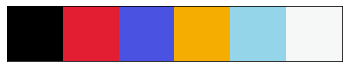

In [2]:
# custom_colors = ['#000000', '#E31E33', '#4A53E1', '#F5AD02', '#94D5EA', '#F6F8F7']
# custom_palette = sns.set_palette(sns.color_palette(custom_colors))
# sns.palplot(sns.color_palette(custom_colors), size = 1)
# plt.tick_params(axis = 'both', labelsize = 0, length = 0)

In [7]:
df = pd.read_csv('H:/AMIT/Machine Learning & AI/project/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [48]:
df_test = pd.read_csv('H:/AMIT/Machine Learning & AI/project/test.csv')
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
print(df.isna().sum())
print('----------------------------')
print('Total Missing Values: ', df.isna().sum().sum())
print('----------------------------')

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
----------------------------
Total Missing Values:  2594
----------------------------


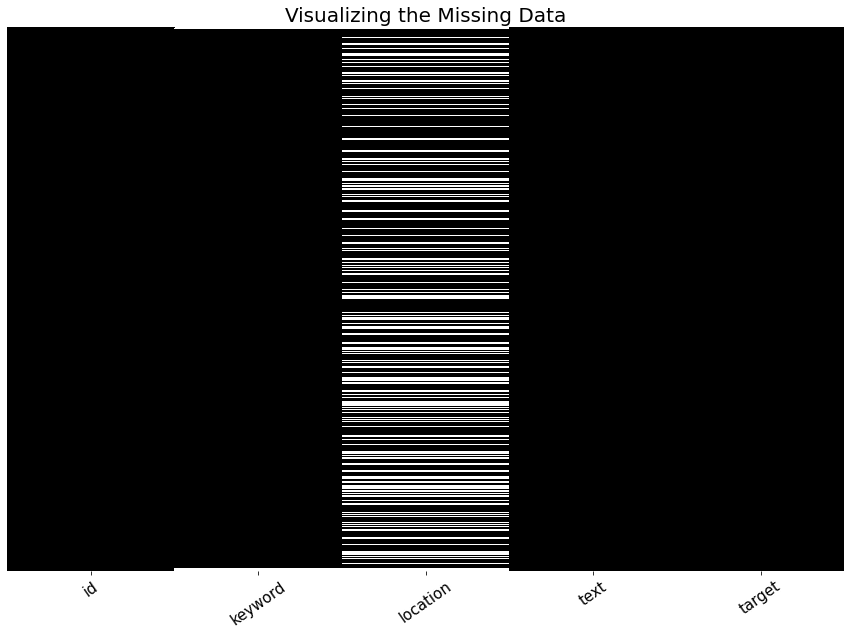

In [9]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = 'afmhot')
plt.title("Visualizing the Missing Data", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

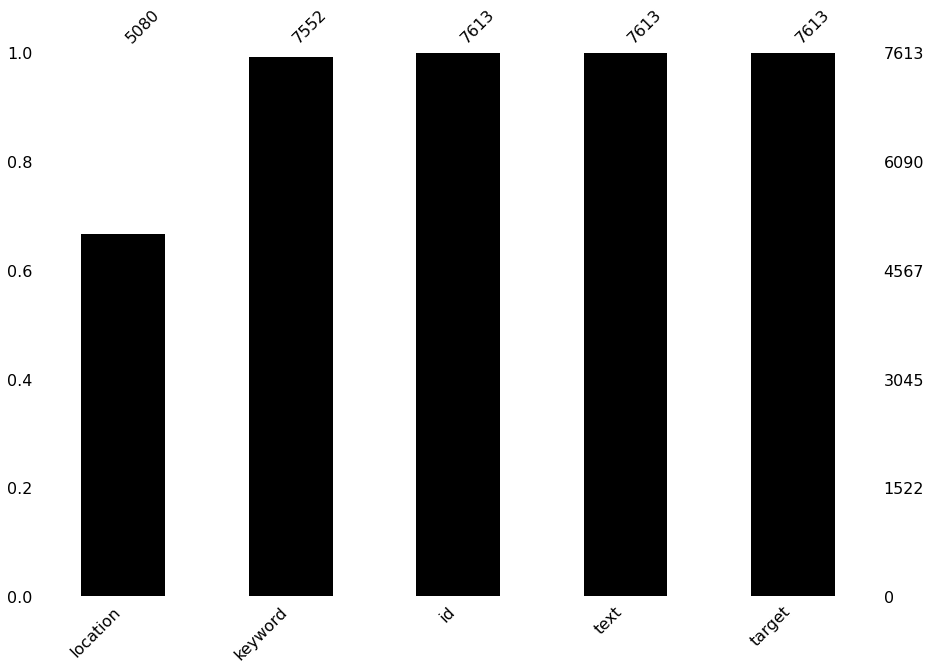

In [10]:
msno.bar(df, color = (0, 0, 0), sort = "ascending", figsize = (15, 10))
plt.show()

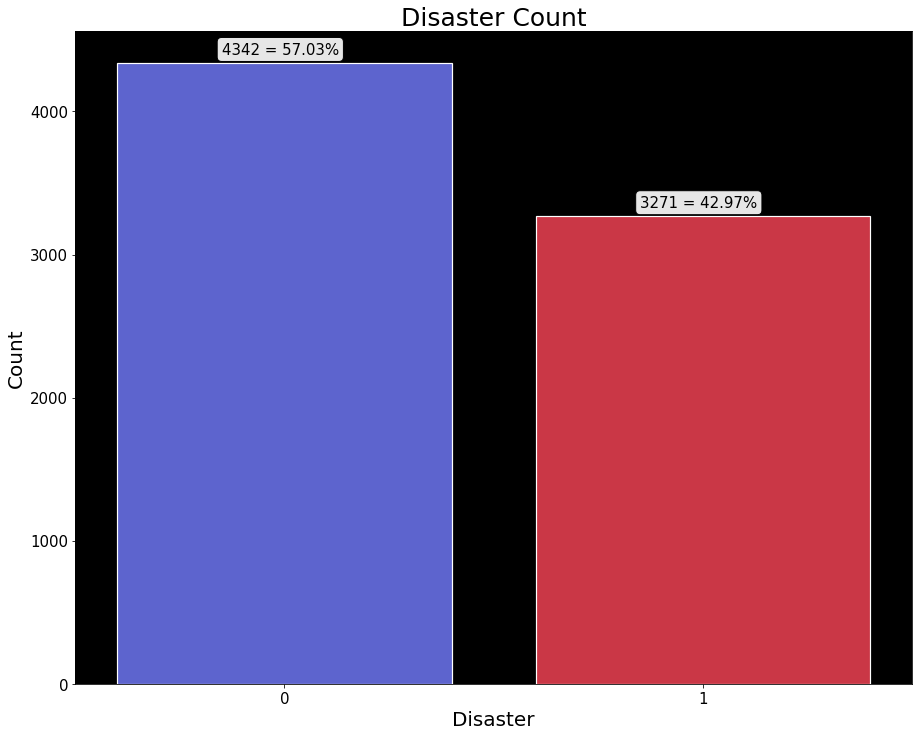

In [11]:
plt.figure(figsize = (15, 12))
ax = plt.axes()
ax.set_facecolor('black')
ax = sns.countplot(x = 'target', data = df, palette = [custom_colors[2], custom_colors[1]], edgecolor = 'white', linewidth = 1.2)
plt.title('Disaster Count', fontsize = 25)
plt.xlabel('Disaster', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['target'])) * 100), (p.get_x() + 0.25, p.get_height() + 60), 
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 15)
plt.show()

In [12]:
df['location'].value_counts()[:10]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

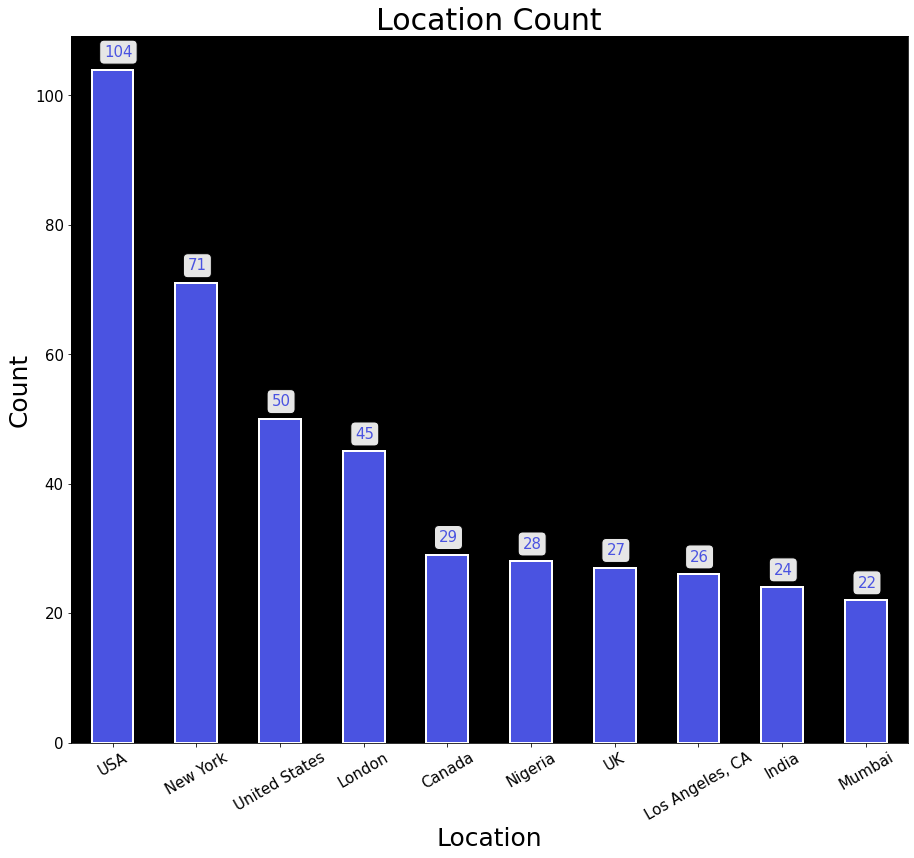

In [13]:
plt.figure(figsize = (15, 13))
ax = plt.axes()
ax.set_facecolor('black')
ax = ((df.location.value_counts())[:10]).plot(kind = 'bar', color = custom_colors[2], linewidth = 2, edgecolor = 'white')
plt.title('Location Count', fontsize = 30)
plt.xlabel('Location', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
ax.xaxis.set_tick_params(labelsize = 15, rotation = 30)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 2),
                   bbox = bbox_args,
                   color = custom_colors[2],
                   fontsize = 15)

In [14]:
new_df = pd.DataFrame()
new_df['location'] = ((df['location'].value_counts())[:10]).index
new_df['count'] = ((df['location'].value_counts())[:10]).values
geolocator = Nominatim(user_agent = 'Rahil')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 0.5)
lat = {}
long = {}
for i in new_df['location']:
    location = geocode(i)
    lat[i] = location.latitude
    long[i] = location.longitude
new_df['latitude'] = new_df['location'].map(lat)
new_df['longitude'] = new_df['location'].map(long)
map = folium.Map(location = [10.0, 10.0], tiles = 'CartoDB dark_matter', zoom_start = 1.5)
markers = []
title = '''<h1 align = "center" style = "font-size: 35px"><b>Top 10 Tweet Locations</b></h1>'''
for i, r in new_df.iterrows():
    loss = r['count']
    if r['count'] > 0:
        counts = r['count'] * 0.4
        folium.CircleMarker([float(r['latitude']), float(r['longitude'])], radius = float(counts), color = custom_colors[1], fill = True).add_to(map)
map.get_root().html.add_child(folium.Element(title))
map

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zizoe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
non_list_stopwords = stopwords.words('english')
stopwords = list(stopwords.words('english'))
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
non_disaster_tweets_length = (df[df['target'] == 0])['text'].str.len()
disaster_tweets_length = (df[df['target'] == 1])['text'].str.len()
print(non_disaster_tweets_length)
print(disaster_tweets_length)

15       14
16       13
17       16
18       17
19       28
       ... 
7581    104
7582     80
7584    127
7587     18
7593     60
Name: text, Length: 4342, dtype: int64
0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 3271, dtype: int64


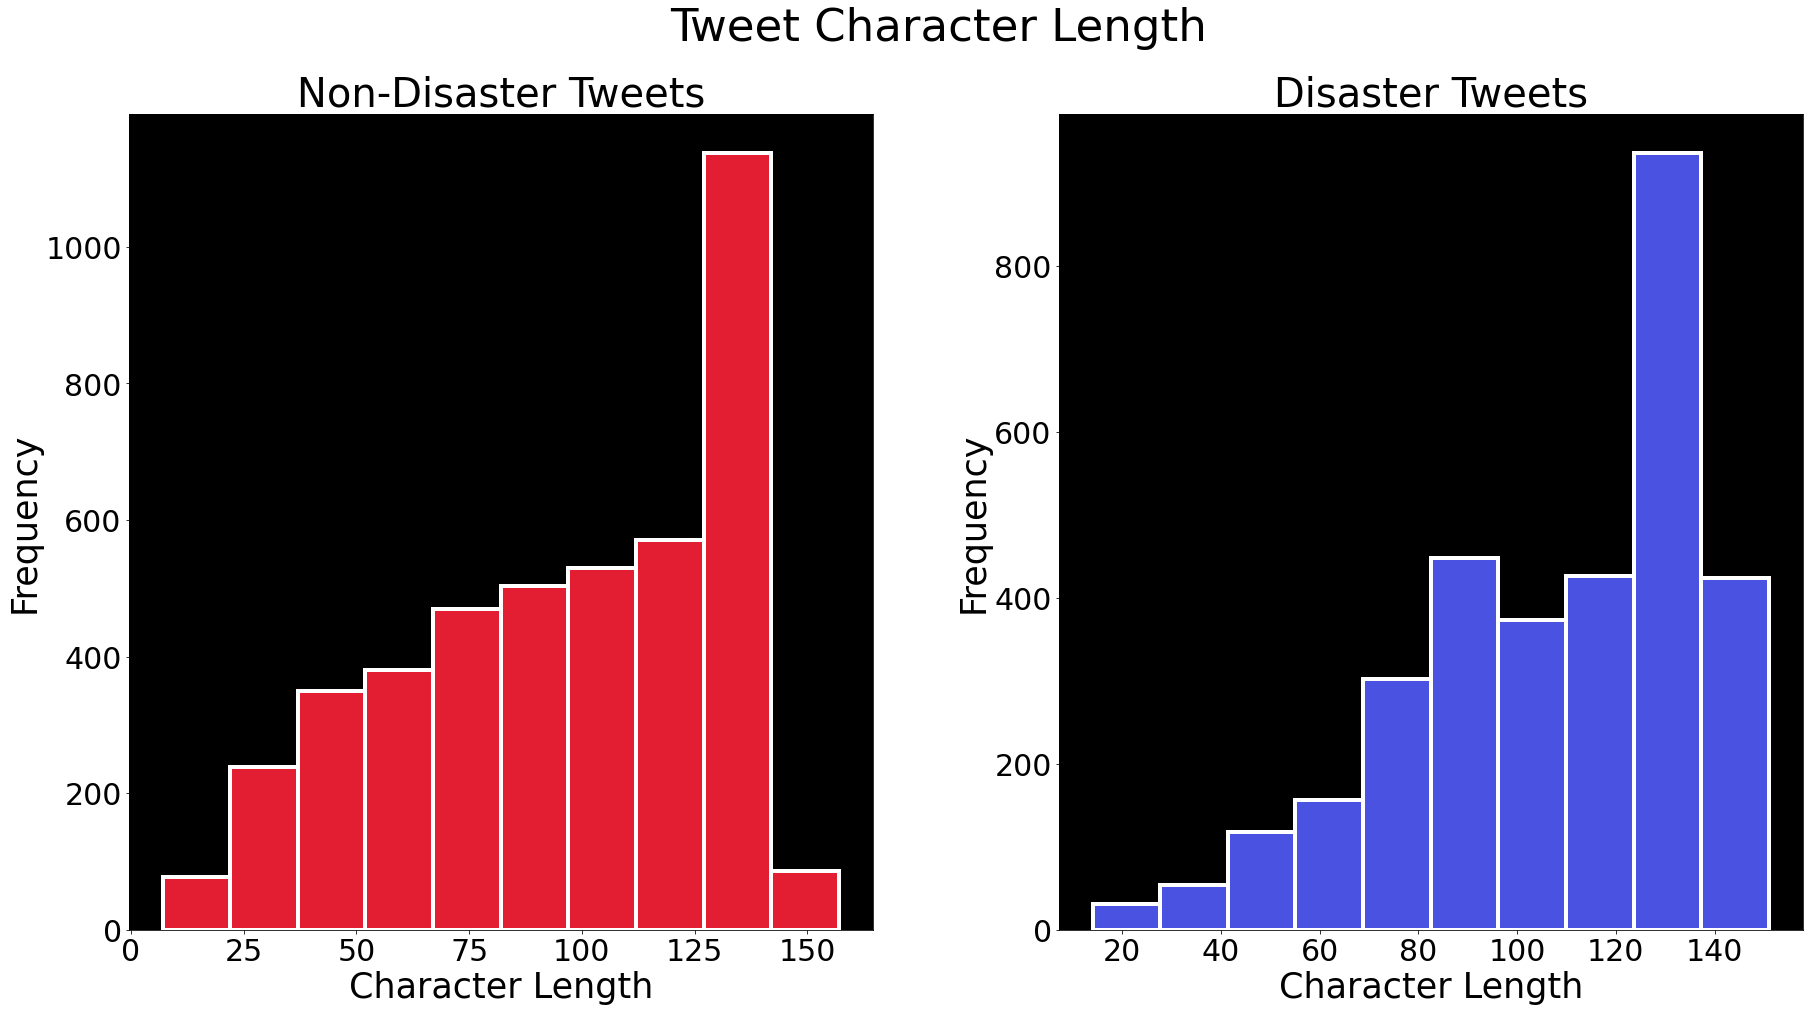

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (30, 15))
fig.suptitle('Tweet Character Length', fontsize = 45)

axes[0].set_facecolor('black')
axes[0].hist(non_disaster_tweets_length, color = custom_colors[1], edgecolor = 'white', linewidth = 4)
axes[0].set_title('Non-Disaster Tweets', fontsize = 40)
axes[0].set_xlabel('Character Length', fontsize = 35)
axes[0].set_ylabel('Frequency', fontsize = 35)
axes[0].xaxis.set_tick_params(labelsize = 30)
axes[0].yaxis.set_tick_params(labelsize = 30)

axes[1].set_facecolor('black')
axes[1].hist(disaster_tweets_length, color = custom_colors[2], edgecolor = 'white', linewidth = 4)
axes[1].set_title('Disaster Tweets', fontsize = 40)
axes[1].set_xlabel('Character Length', fontsize = 35)
axes[1].set_ylabel('Frequency', fontsize = 35)
axes[1].xaxis.set_tick_params(labelsize = 30)
axes[1].yaxis.set_tick_params(labelsize = 30)

plt.subplots_adjust(wspace = 0.25, hspace = 0.1)
plt.show()

In [27]:
class tweet_functions:
    
    '''Getting the count of different attributes of our tweets'''
    
    def __init__(self, column):
        self.column = column
        
    def count_characters(self):
        return((self.column).apply(lambda word: len(str(word))))
    
    def count_words(self):
        return((self.column).apply(lambda word: len(str(word).split())))
    
    def count_urls(self):
        return((self.column).apply(lambda word: len([url for url in str(word).lower().split() if 'http' in word or 'https' in word])))
    
    def count_hashtags(self):
        return((self.column).apply(lambda word: len([hashtag for hashtag in str(word) if '#' in hashtag])))
    
    def count_tags(self):
        return((self.column).apply(lambda word: len([tag for tag in str(word) if '@' in tag])))
    
    def count_stopwords(self):
        return((self.column).apply(lambda word: len([word for word in str(word).lower().split() if word in stopwords])))


In [28]:
def remove_urls(text):
    urls = re.compile(r'https?://\S+|www\.\S+')
    return urls.sub(r'', text)

def remove_HTML(text):
    html = re.compile('<.*?>')
    return html.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile('['
                           u'\U0001F600-\U0001F64F'
                           u'\U0001F300-\U0001F5FF'
                           u'\U0001F680-\U0001F6FF'
                           u'\U0001F1E0-\U0001F1FF'
                           u'\U00002702-\U000027B0'
                           u'\U000024C2-\U0001F251'
                           ']+', flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_emoticons(text):
    emoticons = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
    }
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in emoticons) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_mentions(text):
    mentions = re.compile('@[A-Za-z0-9_]+')
    return mentions.sub(r'', text)

def word_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zizoe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [31]:
df['text'] = df['text'].str.lower() # convert to lowercase
df['text'] = df['text'].apply(lambda text: remove_urls(text)) # remove URLs
df['text'] = df['text'].apply(lambda text: remove_HTML(text)) # remove HTML tags
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation)) # remove punctuations
df['text'] = df['text'].apply(lambda text: ' '.join([word for word in str(text).split() if word not in stopwords])) # remove stopwords
df['text'] = df['text'].apply(lambda text: remove_emoji(text)) # remove emojis
df['text'] = df['text'].apply(lambda text: remove_emoticons(text)) # remove emoticons
df['text'] = df['text'].apply(lambda text: remove_mentions(text)) # remove mentions
df['text'] = df['text'].apply(lambda text: word_lemmatizer(text)) # lemmatize words
df['text'] = df['text'].apply(lambda text: th.cont_exp(text)) # convert i'm to i am, you're to you are, etc
df['text']

0            deed reason earthquake may allah forgive you
1                   forest fire near la ronge sask canada
2       resident asked shelter place notified officer ...
3       13000 people receive wildfire evacuation order...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    ariaahrary thetawniest control wild fire calif...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: text, Length: 7613, dtype: object

In [32]:
counter = Counter()
for text in df['text'].values:
    for word in text.split():
        counter[word] += 1
counter.most_common(10)

[('fire', 350),
 ('like', 347),
 ('im', 299),
 ('amp', 298),
 ('you', 261),
 ('get', 256),
 ('new', 236),
 ('via', 220),
 ('people', 217),
 ('one', 205)]

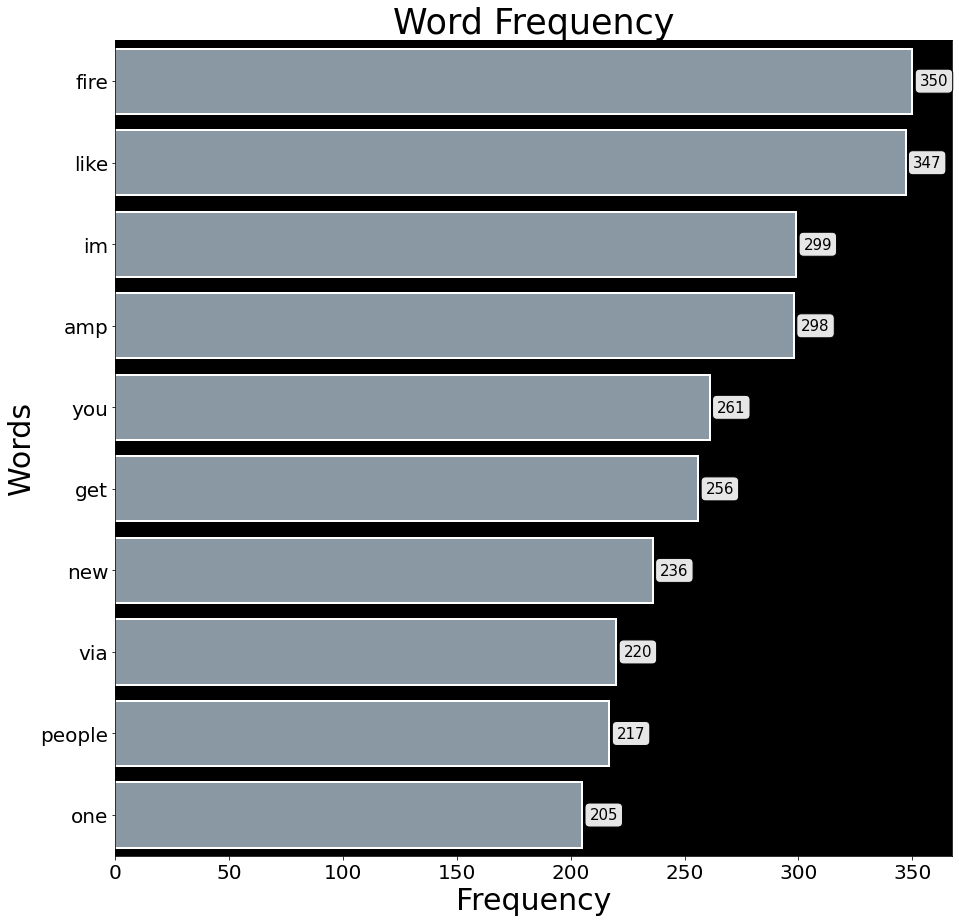

In [33]:
data = dict(sorted(counter.items(), key = lambda x: x[1] ,reverse = True)[:10])
words = list(data.keys())
frequency = list(data.values())

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 15))
ax.set_facecolor('black')
ax = sns.barplot(x = frequency, y = words, color = '#8699A7', edgecolor = 'white', linewidth = 2)
plt.title('Word Frequency', fontsize = 35)
plt.xlabel('Frequency', fontsize = 30)
plt.ylabel('Words', fontsize = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
    width = p.get_width()
    plt.text(9.5 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)
plt.show()

In [35]:
def generate_ngrams(text, n_gram = 0):
    token = [token for token in text.lower().split(' ') if token != '' if token not in non_list_stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

def generate_ngram_plots(n_gram, labelsize_for_axes):
    non_disaster_ngrams = defaultdict(int)
    disaster_ngrams = defaultdict(int)

    for tweet in df[df['target'] == 0]['text']:
        for word in generate_ngrams(tweet, n_gram = n_gram):
            non_disaster_ngrams[word] += 1

    for tweet in df[df['target'] == 1]['text']:
        for word in generate_ngrams(tweet, n_gram = n_gram):
            disaster_ngrams[word] += 1

    non_disaster_ngram_data = dict(sorted(non_disaster_ngrams.items(), key = lambda x: x[1], reverse = True)[:10])
    non_disaster_ngram_words = list(non_disaster_ngram_data.keys())
    non_disaster_ngram_frequency = list(non_disaster_ngram_data.values())

    disaster_ngram_data = dict(sorted(disaster_ngrams.items(), key = lambda x: x[1], reverse = True)[:10])
    disaster_ngram_words = list(disaster_ngram_data.keys())
    disaster_ngram_frequency = list(disaster_ngram_data.values())

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 20))

    axes[0].set_facecolor('black')
    sns.barplot(x = non_disaster_ngram_frequency, y = non_disaster_ngram_words, ax = axes[0], color = '#0057B1', edgecolor = 'white', linewidth = 2)
    if(n_gram == 1):
        axes[0].set_title('Non-Disaster Unigrams', fontsize = 45)
    if(n_gram == 2):
        axes[0].set_title('Non-Disaster Bigrams', fontsize = 45)
    if(n_gram == 3):
        axes[0].set_title('Non-Disaster Trigrams', fontsize = 45)
    axes[0].set_xlabel('Count', fontsize = 40)
    axes[0].set_ylabel('Words', fontsize = 40)
    axes[0].xaxis.set_tick_params(labelsize = labelsize_for_axes)
    axes[0].yaxis.set_tick_params(labelsize = labelsize_for_axes)
    for p in axes[0].patches:
        width = p.get_width()
        if(n_gram == 1 or n_gram == 2):
            axes[0].text(0.75 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
                     ha = 'center', 
                     va = 'center', 
                     color = 'blue', 
                     bbox = bbox_args, 
                     fontsize = 25)
        if(n_gram == 3):
            axes[0].text(0.6 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
                     ha = 'center', 
                     va = 'center', 
                     color = 'blue', 
                     bbox = bbox_args, 
                     fontsize = 22)

    axes[1].set_facecolor('black')
    sns.barplot(x = disaster_ngram_frequency, y = disaster_ngram_words, ax = axes[1], palette = [custom_colors[1]], edgecolor = 'white', linewidth = 2)
    if(n_gram == 1):
        axes[1].set_title('Disaster Unigrams', fontsize = 45)
    if(n_gram == 2):
        axes[1].set_title('Disaster Bigrams', fontsize = 45)
    if(n_gram == 3):
        axes[1].set_title('Disaster Trigrams', fontsize = 45)
    axes[1].set_xlabel('Count', fontsize = 40)
    axes[1].set_ylabel('Words', fontsize = 40)
    axes[1].xaxis.set_tick_params(labelsize = labelsize_for_axes)
    axes[1].yaxis.set_tick_params(labelsize = labelsize_for_axes)
    for p in axes[1].patches:
        width = p.get_width()
        if(n_gram == 1 or n_gram == 2):
            axes[1].text(0.8 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
                     ha = 'center', 
                     va = 'center', 
                     color = 'red', 
                     bbox = bbox_args, 
                     fontsize = 25)
        if(n_gram == 3):
            axes[1].text(0.6 + p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
                     ha = 'center', 
                     va = 'center', 
                     color = 'red', 
                     bbox = bbox_args, 
                     fontsize = 22)
    if(n_gram == 1 or n_gram == 2):
        plt.subplots_adjust(wspace = 0.4)
    if(n_gram == 3):
        plt.subplots_adjust(wspace = 0.6)

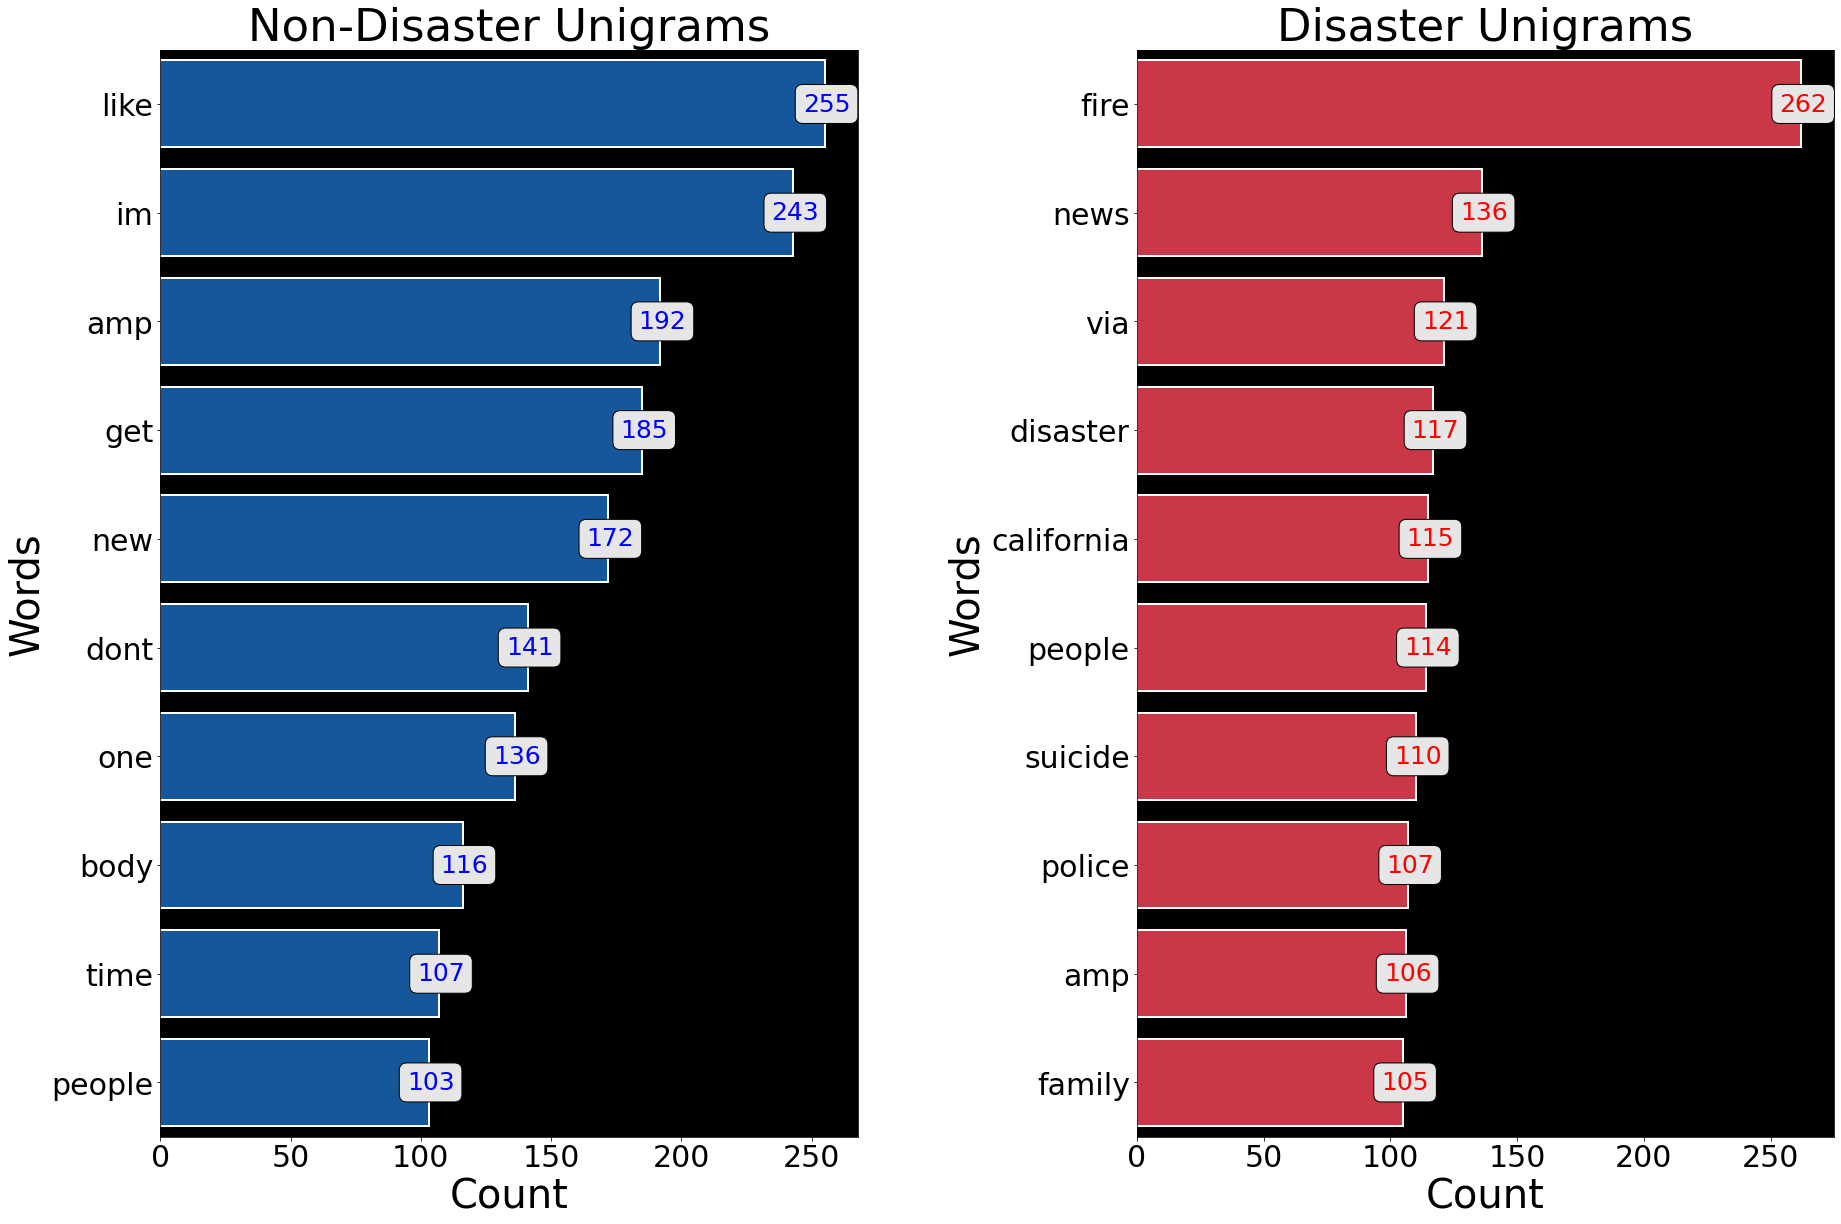

In [36]:
generate_ngram_plots(1, 30)

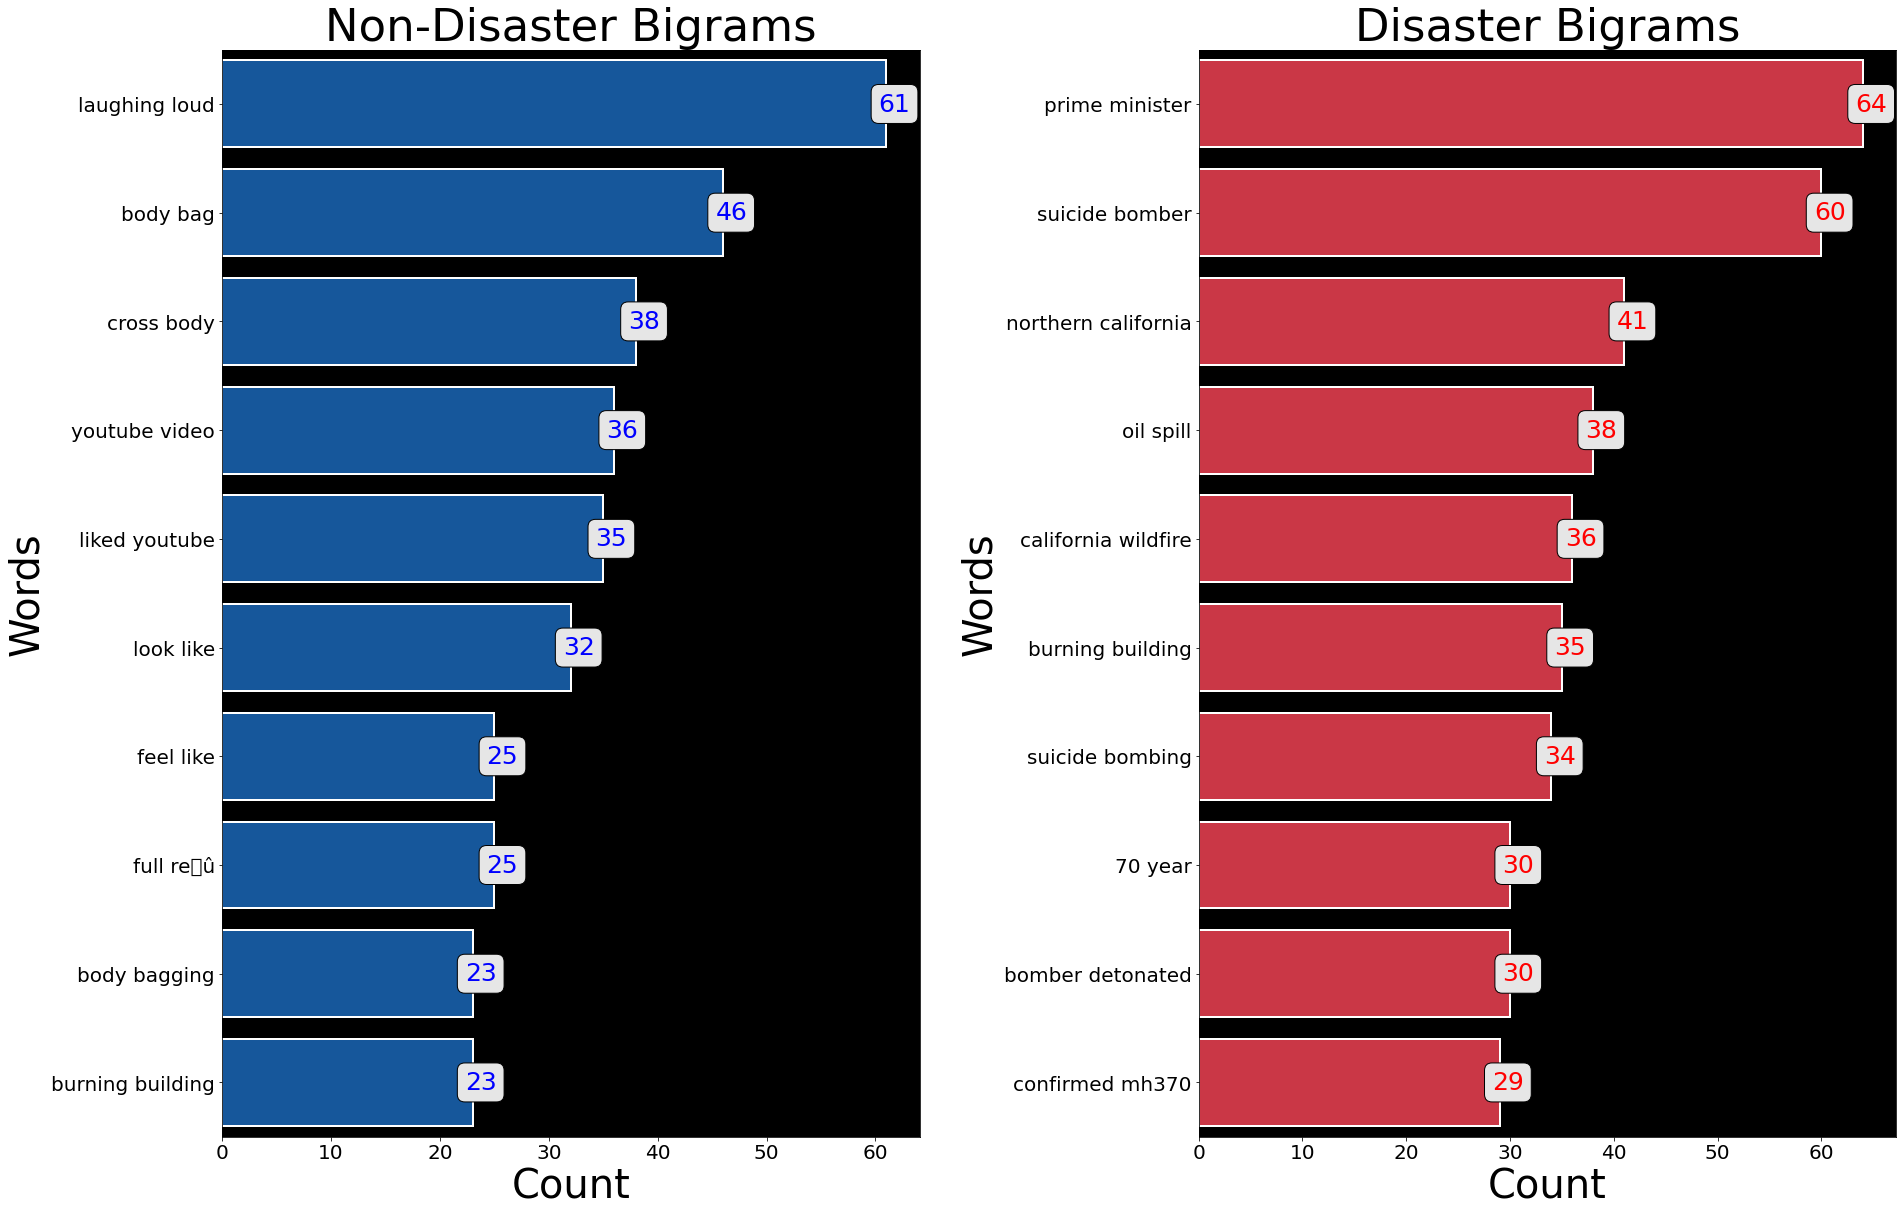

In [37]:
generate_ngram_plots(2, 20)

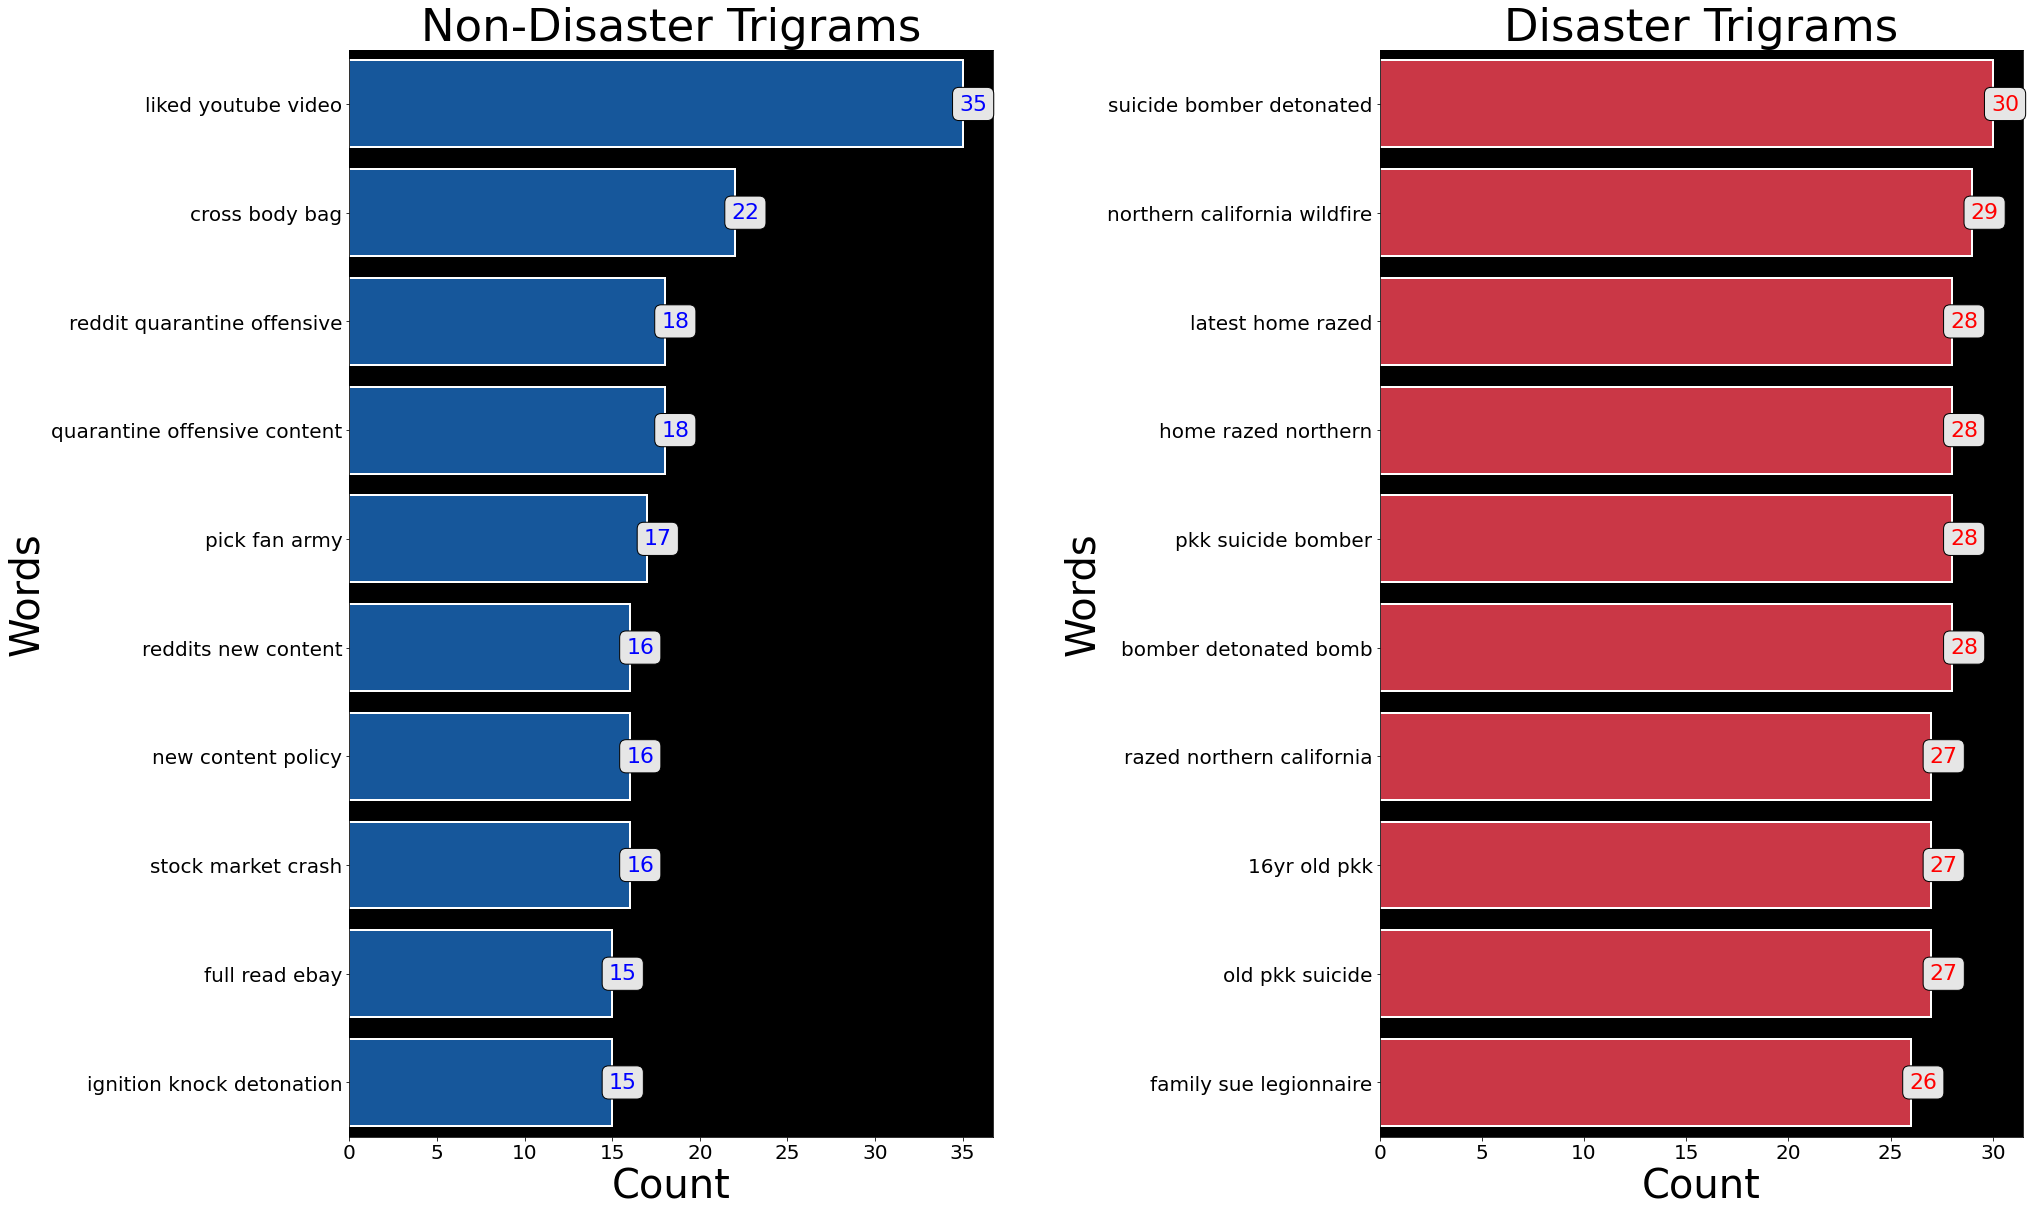

In [38]:
generate_ngram_plots(3, 20)

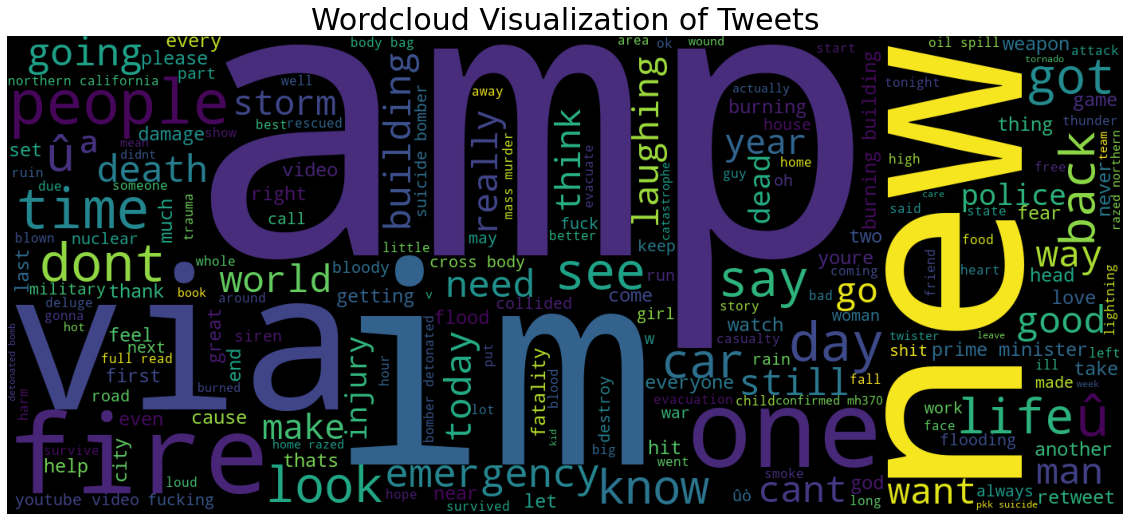

In [39]:
wordcloud = WordCloud(width = 1400, height = 600, background_color = 'black').generate(''.join(text for text in df['text']))
plt.figure(figsize = (20, 10))
plt.title('Wordcloud Visualization of Tweets', fontsize = 30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Dataset Pre-processing

In [40]:
def na_proportions(data, column_name, as_pct):
    if column_name in data.columns:
        na_counts = len(data[pd.isna(data[column_name])])
        non_na_counts = len(data[~pd.isna(data[column_name])])
    else:
        na_counts = None
        non_na_counts = None
        
    if as_pct:
        na_counts /= data.shape[0]
        non_na_counts /= data.shape[0]
    return (column_name, na_counts, non_na_counts)

In [43]:
keyword_props = na_proportions(data=df, column_name='keyword', as_pct=True)
print(f'The {keyword_props[0]} variable has: NA={keyword_props[1]:.3f} NON-NA={keyword_props[2]:.3f}')
location_props = na_proportions(data=df, column_name='location', as_pct=True)
print(f'The {location_props[0]} variable has: NA={location_props[1]:.3f} NON-NA={location_props[2]:.3f}')

The keyword variable has: NA=0.008 NON-NA=0.992
The location variable has: NA=0.333 NON-NA=0.667


In [44]:
# %20 is the URL encoding of space, let's replace them with '_'
def re_encode_space(input_string):
    return None if pd.isna(input_string) else input_string.replace('%20', '_')


# Let's try to find hastags
import re

def find_hash_tags(input_string):
    hash_tags = re.findall(r"#(\w+)", str(input_string))
    return ','.join(hash_tags)


# Let's turn hashtags to normal words
def re_encode_hashtags(input_string):
    return None if pd.isna(input_string) else input_string.replace('#', '')


# Let's remove URLs from the tweets
def remove_links(input_string):
    res = input_string
    urls = re.findall(r'(https?://[^\s]+)', res)
    for link in urls:
        res = res.strip(link)
    return res


# Let's remove the state abbreviations
def state_renaming(input_string):

    states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District_of_Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North_Carolina',
        'ND': 'North_Dakota',
        'NE': 'Nebraska',
        'NH': 'New_Hampshire',
        'NJ': 'New_Jersey',
        'NM': 'New_Mexico',
        'NV': 'Nevada',
        'NY': 'New_York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode_Island',
        'SC': 'South_Carolina',
        'SD': 'South_Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West_Virginia',
        'WY': 'Wyoming'
    }

    result = input_string
    
    if isinstance(input_string, str):
        input_candidates = input_string.split(', ')
        
        if len(input_candidates) > 1:
            for candidate in input_candidates:
                if candidate in states.keys():
                    result = states[candidate]
                
    if input_string in states.keys():
        result = states[input_string]

    return result


In [45]:
# Let's wrap the preprocessing functions so it's easier to
# process both train and test dataset
def preprocess_data(input_data):
    input_df = input_data.copy()
    input_df['keyword'] = input_df['keyword'].map(re_encode_space)
    input_df['keyword'].fillna('Missing', inplace=True)
    input_df['hashtags'] = input_df['text'].map(find_hash_tags)
    input_df['text'] = input_df['text'].map(re_encode_hashtags)
    input_df['text'] = input_df['text'].map(remove_links)
    input_df['location'] = input_df['location'].map(state_renaming)
    return input_df

In [49]:
df = preprocess_data(df)
df_test = preprocess_data(df_test)

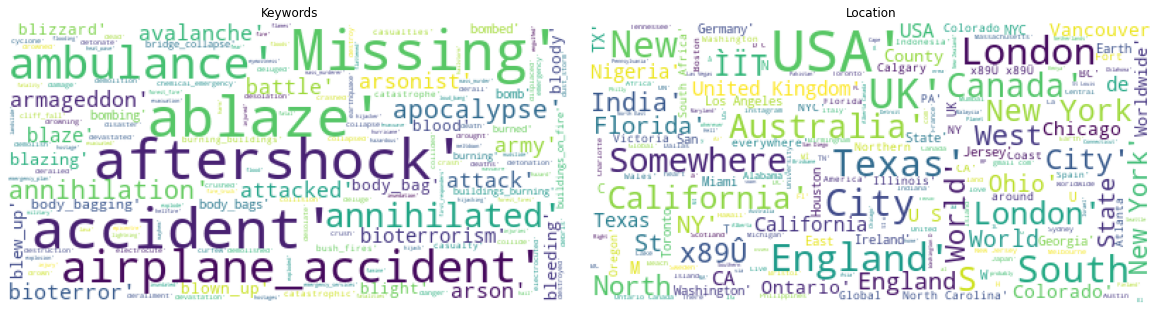

In [54]:
# We notice that keyword field has missing values
# We notice location has missing values

# Let's Visualize the keyword field in a word cloud to get an idea of what it is
import matplotlib.pyplot as plt
from wordcloud import WordCloud

keyword_words = str(df['keyword']
    .dropna()
    .unique()
    .tolist()
)

location_words = str(df['location']
    .dropna()
    .unique()
    .tolist()
)


keyword_wordcloud = WordCloud(
    background_color='white',
    stopwords=None,
    max_words=200,
    max_font_size=40, 
    random_state=42
).generate(keyword_words)

location_wordcloud = WordCloud(
    background_color='white',
    stopwords=None,
    max_words=200,
    max_font_size=40, 
    random_state=42
).generate(location_words)

fig, ax = plt.subplots(1,2, figsize=(16,9), constrained_layout=True)
ax[0].set_title("Keywords")
ax[0].imshow(keyword_wordcloud)
ax[0].axis(False)
ax[1].set_title('Location')
ax[1].imshow(location_wordcloud)
ax[1].axis(False)
plt.show()


In [55]:
keyword_props = na_proportions(data=df, column_name='keyword', as_pct=True)
print(f'The {keyword_props[0]} variable has: NA={keyword_props[1]:.3f} NON-NA={keyword_props[2]:.3f}')
location_props = na_proportions(data=df, column_name='location', as_pct=True)
print(f'The {location_props[0]} variable has: NA={location_props[1]:.3f} NON-NA={location_props[2]:.3f}')

The keyword variable has: NA=0.000 NON-NA=1.000
The location variable has: NA=0.333 NON-NA=0.667


In [56]:
#approach: Word2Vec embeddings and a simple LSTM-based network

In [58]:
from nltk.tokenize import TweetTokenizer

In [60]:
# The tokenizer is responsible to turn a string of words
# into a list of tokens (words) for which we'll get their
# vector representation (embeddings)
tknzr = TweetTokenizer(
    preserve_case=False,
    reduce_len=True,
    strip_handles=True,
)


def tokenize_tweets(tokenizer, input_text):
    tokens = list(tokenizer.tokenize(input_text))
    tokens = [re.sub('[^A-Za-z0-9]+', '', i) for i in tokens]
    return tokens

df['tokens'] = df['text']
df['tokens'] = df['tokens'].apply(lambda x: tokenize_tweets(tknzr, x))

df_test['tokens'] = df_test['text'].apply(lambda x: tokenize_tweets(tknzr, x))

In [72]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\zizoe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping models\word2vec_sample.zip.


True

In [73]:
# Our dataset is quite small so if we train the word2vec model the
# resulting embeddings will be poor in quality. Therefore we use a
# pre-trained model
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)
features = 300

In [75]:
# We'll pad all embeddings to match the length of the biggest tweet
# in order to account for the variability in tweet length
# Later on the model is going to mask the padded values, so that
# they won't influence the result
max_tweet_length = max(df['tokens'].apply(lambda x: len(x)).max(), 
                       df_test['tokens'].apply(lambda x: len(x)).max())

In [76]:
# Let's compute the embeddings for every word that the pre-trained model
# has in its vocabulary.
def vectorize_tokens(data_, vec_model, max_seq, num_features):
    data_in = data_.copy()
    # List to save all text embeddings
    all_vectors = []
    # Iterate over each text
    for _, row in data_in.iterrows():
        # Initialize a 2D matrix with zeros. Equivalent to 0 padding
        # in the 1st dimension, to accomondate for variable text length
        text_vectors = np.zeros((max_seq, num_features))
        # If the word exists in the model vocabulary add its embeddings
        # else keep the zeros as unknown words
        for i, item in enumerate(row['tokens']):
            try:
                text_vectors[i, :] = vec_model[item]
            except:
                continue
        all_vectors.append(text_vectors)
    
    return all_vectors

In [78]:
df['vectors'] = vectorize_tokens(data_=df, 
                                            vec_model=word2vec_model, 
                                            max_seq=max_tweet_length, 
                                            num_features=features)

df_test['vectors'] = vectorize_tokens(data_=df_test, 
                                        vec_model=word2vec_model, 
                                        max_seq=max_tweet_length, 
                                        num_features=features)

In [79]:
# Logic to have the training dataset as a 3D array of (text_count, max_sequence_length, embedding_size)
X = np.asarray(df['vectors'].tolist()).astype(np.float32)
y = np.asarray(df['target'].tolist()).astype(np.float32)

test_array = np.asarray(df_test['vectors'].tolist()).astype(np.float32)

In [80]:
model = Sequential([
    Input(shape=(max_tweet_length, features)),
    Masking(),
    LSTM(32),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])


skf = StratifiedKFold(n_splits=5)
train_average_score = 0
validation_average_score = 0
validation_oof_predictions = np.zeros((len(X)))

# It's a good practice to predict the test set on every fold
# And average the predictions over the folds
averaged_test_predictions = np.zeros((test_array.shape[0]))

# It's standard practice to use Stratified k-fold cross validation
# so we're also using it here
for fold_n, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Re-compile the model at every fold to "reset" it
    model.compile(optimizer='adam', loss='binary_crossentropy')
    
    # Simple training strategy, hyper-parameters haven't been tuned
    model.fit(x=X_train, y=y_train, batch_size=32, epochs=3)
    
    train_predictions = model.predict(X_train)
    validation_predictions = model.predict(X_test)
    
    train_score = roc_auc_score(y_train, train_predictions)
    validation_score = roc_auc_score(y_test, validation_predictions)
    
    train_average_score += train_score / 5
    validation_average_score += validation_score / 5
    validation_oof_predictions[test_idx,] = (validation_predictions > 0.5).astype(int).flatten()
    
    print(f'Fold: {fold_n}, train auc: {train_score:.3f}, validation auc: {validation_score:.3f}')
    
    test_predictions = model.predict(test_array).flatten()
    averaged_test_predictions += test_predictions / 5
    
print(f'Train average: {train_average_score:.3f}, validation average: {validation_average_score:.3f}')
print(f'OOF Accuracy Score: {accuracy_score(y, validation_oof_predictions)}')

Epoch 1/3
191/191 [==============================] - 11s 30ms/step - loss: 0.5675
Epoch 2/3
191/191 [==============================] - 5s 29ms/step - loss: 0.4856
Epoch 3/3
191/191 [==============================] - 5s 28ms/step - loss: 0.4654
Fold: 0, train auc: 0.862, validation auc: 0.815
Epoch 1/3
191/191 [==============================] - 11s 28ms/step - loss: 0.4523
Epoch 2/3
191/191 [==============================] - 6s 30ms/step - loss: 0.4345
Epoch 3/3
191/191 [==============================] - 6s 31ms/step - loss: 0.4236
Fold: 1, train auc: 0.890, validation auc: 0.815
Epoch 1/3
191/191 [==============================] - 11s 29ms/step - loss: 0.4319
Epoch 2/3
191/191 [==============================] - 6s 30ms/step - loss: 0.4194
Epoch 3/3
191/191 [==============================] - 5s 28ms/step - loss: 0.4089
Fold: 2, train auc: 0.894, validation auc: 0.861
Epoch 1/3
191/191 [==============================] - 11s 30ms/step - loss: 0.4192
Epoch 2/3
191/191 [====================